In [23]:
import ee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ee.Initialize()

## Plot monthly crop ET time series

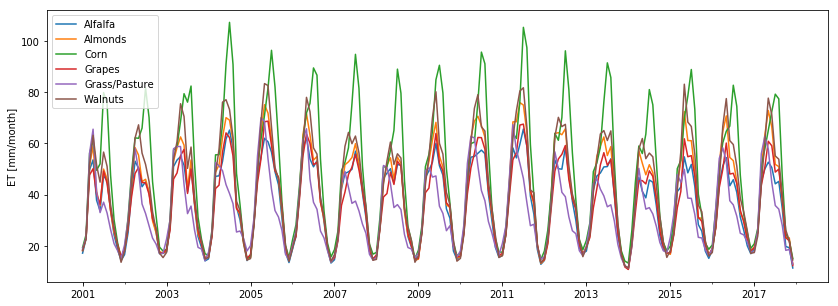

In [24]:
df = pd.read_csv('../data/et_crops_2001_2017.csv', index_col=0, parse_dates=True)
f,ax=plt.subplots(1,figsize=(14,5))
df.plot(ax=ax)
ax.set_ylabel('ET [mm/month]')
plt.legend(loc='upper left')
f.savefig('../plots/crops_monthly.pdf')

years = []
vals = []
crops = []
for year in range(2001, 2017):
    start_date = str(year) + '-07-01'
    end_date = str(year+1) + '-06-30'
    tempdf = df.loc[start_date:end_date].sum()
    crops = crops + tempdf.index.tolist()
    vals = vals + tempdf.values.tolist()
    years = years + [year+1]*len(tempdf)

wys = pd.DataFrame({'crop':crops, 'Annual ET [mm]':vals, 'year':years}).pivot(columns='crop', values='Annual ET [mm]', index='year')
wys.to_csv('../data/wy_totals_crops.csv')
wys.std().to_csv('../data/wy_sd_crops.csv')
wys.mean().to_csv('../data/wy_mean_crops.csv')

## Plot ET monthly by region

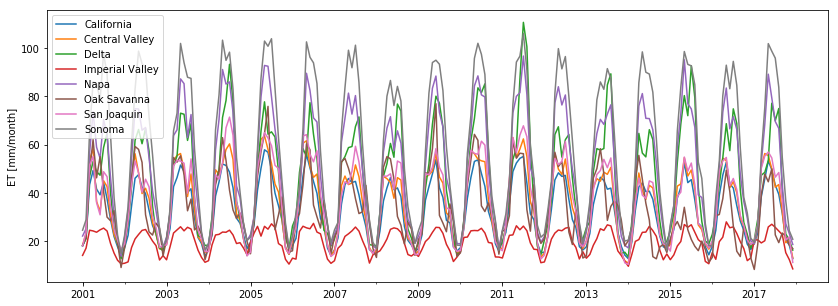

In [25]:
df = pd.read_csv('../data/et_regions_2001-2017.csv', index_col=0, parse_dates=True)
f, ax = plt.subplots(1, figsize=(14,5))
df.plot(ax=ax)
ax.set_ylabel('ET [mm/month]')
f.savefig('../plots/regions_monthly.pdf')

years = []
vals = []
regions = []
for year in range(2001, 2017):
    start_date = str(year) + '-07-01'
    end_date = str(year+1) + '-06-30'
    tempdf = df.loc[start_date:end_date].sum()
    regions = regions + tempdf.index.tolist()
    vals = vals + tempdf.values.tolist()
    years = years + [year+1]*len(tempdf)

wys = pd.DataFrame({'region':regions, 'Annual ET [mm]':vals, 'year':years}).pivot(columns='region', values='Annual ET [mm]', index='year')
wys.to_csv('../data/wy_totals_regions.csv')
wys.std().to_csv('../data/wy_sd_regions.csv')
wys.mean().to_csv('../data/wy_mean_regions.csv')

## Plot ET monthly by bioregion

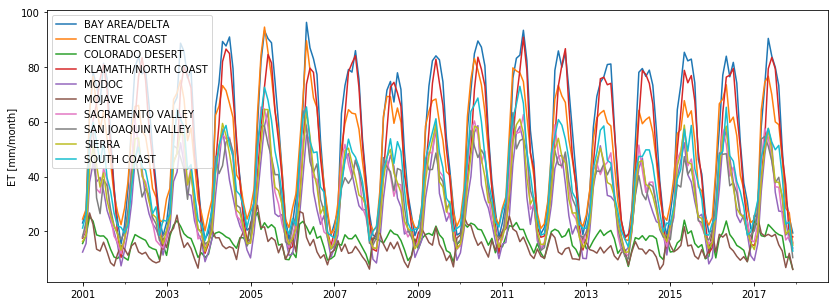

In [26]:
df = pd.read_csv('../data/et_bioregions_2001-2017.csv', index_col=0, parse_dates=True)
f, ax = plt.subplots(1, figsize=(14,5))
df.plot(ax=ax)
ax.set_ylabel('ET [mm/month]')
f.savefig('../plots/bioregions_monthly.pdf')

years = []
vals = []
regions = []
for year in range(2001, 2017):
    start_date = str(year) + '-07-01'
    end_date = str(year+1) + '-06-30'
    tempdf = df.loc[start_date:end_date].sum()
    regions = regions + tempdf.index.tolist()
    vals = vals + tempdf.values.tolist()
    years = years + [year+1]*len(tempdf)

wys = pd.DataFrame({'bioregion':regions, 'Annual ET [mm]':vals, 'year':years}).pivot(columns='bioregion', values='Annual ET [mm]', index='year')
wys.to_csv('../data/wy_totals_bioregions.csv')
wys.std().to_csv('../data/wy_sd_bioregions.csv')
wys.mean().to_csv('../data/wy_mean_bioregions.csv')